In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Combined_Data_For_Analysis.csv")

In [3]:
df.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
0,Maharashtra,Nashik,Chandvad,Red,Vegetables,1505,1200,3025,2850,29-Dec-17
1,Maharashtra,Nashik,Chandvad,Red,Vegetables,1200,1700,2976,2800,28-Dec-17
2,Maharashtra,Nashik,Chandvad,Red,Vegetables,1912,1500,3000,2850,27-Dec-17
3,Maharashtra,Nashik,Chandvad,Red,Vegetables,800,1300,2750,2490,22-Dec-17
4,Maharashtra,Nashik,Chandvad,Red,Vegetables,1588,1400,2850,2670,21-Dec-17


In [4]:
#Feature Engineering of Date column to decrease high cardinality:
df['date_arrival'] = pd.to_datetime(df['date_arrival'])
df['year'] = df['date_arrival'].dt.year
df['month'] = df['date_arrival'].dt.month
df['day'] = df['date_arrival'].dt.day

In [5]:
#Drop Date column:
df.drop('date_arrival', axis = 1, inplace = True)
df.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,year,month,day
0,Maharashtra,Nashik,Chandvad,Red,Vegetables,1505,1200,3025,2850,2017,12,29
1,Maharashtra,Nashik,Chandvad,Red,Vegetables,1200,1700,2976,2800,2017,12,28
2,Maharashtra,Nashik,Chandvad,Red,Vegetables,1912,1500,3000,2850,2017,12,27
3,Maharashtra,Nashik,Chandvad,Red,Vegetables,800,1300,2750,2490,2017,12,22
4,Maharashtra,Nashik,Chandvad,Red,Vegetables,1588,1400,2850,2670,2017,12,21


In [6]:
df1 = df.groupby('market_center_name', as_index=False)['Arrival'].\
    mean().dropna().sort_values('Arrival', ascending=False)
df1.head(20)

,market_center_name,Arrival
14,Pimpalgaon,1529.505282
18,Umrane,1350.385714
5,Lasalgaon,1310.289980
9,Malegaon(Umarane),1237.098529
19,Yeola,1092.992158
11,Nampur,994.692580
7,Lasalgaon(Vinchur),954.064990
8,Malegaon,924.612319
16,Satana,848.235477
0,Chandvad,773.156082


<ipython-input-7-37881a7ee457>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Trend = df.groupby('day')['MODAL','Arrival'].mean().dropna()


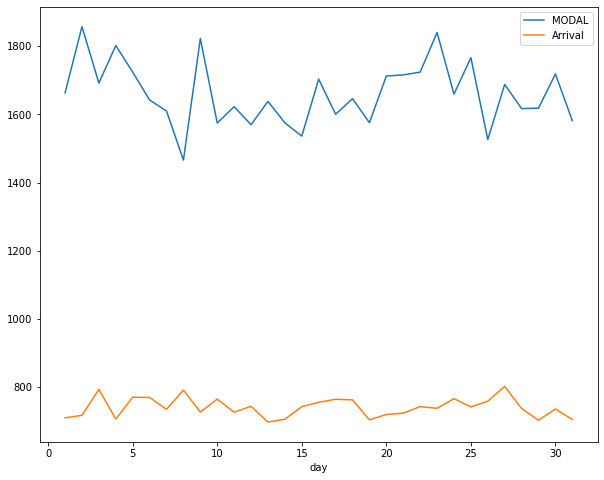

In [7]:
Trend = df.groupby('day')['MODAL','Arrival'].mean().dropna()
Trend.plot(figsize=(10,8))
plt.show()

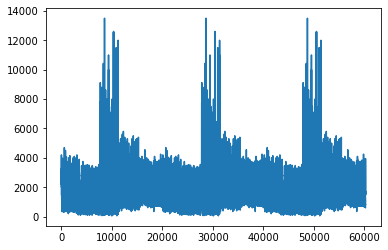

In [8]:
df.MODAL.plot(kind="line")
plt.show()

In [9]:
df["priceDiff"] = df["MAX"] - df["MIN"]
df.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,year,month,day,priceDiff
0,Maharashtra,Nashik,Chandvad,Red,Vegetables,1505,1200,3025,2850,2017,12,29,1825
1,Maharashtra,Nashik,Chandvad,Red,Vegetables,1200,1700,2976,2800,2017,12,28,1276
2,Maharashtra,Nashik,Chandvad,Red,Vegetables,1912,1500,3000,2850,2017,12,27,1500
3,Maharashtra,Nashik,Chandvad,Red,Vegetables,800,1300,2750,2490,2017,12,22,1450
4,Maharashtra,Nashik,Chandvad,Red,Vegetables,1588,1400,2850,2670,2017,12,21,1450


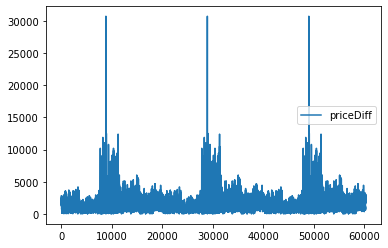

In [10]:
df.plot(y="priceDiff")
plt.show()

In [11]:
df_Pivot = pd.pivot_table(df, values = "priceDiff", columns = "year", index = "month")
df_Pivot

year,2017,2018,2019,2020,2021
month,,,,,
1,435.743860,1810.161491,407.621315,2672.556548,1851.301887
2,371.127413,963.666667,357.269504,1409.160410,2383.495627
3,327.828042,453.059896,466.195364,1038.669811,1032.375576
4,341.692607,428.707031,638.612245,650.819444,666.390123
5,406.347826,536.557276,832.977273,530.992754,993.381757
6,432.907834,716.146032,908.926174,642.361323,1450.367609
7,556.783537,796.426710,852.723032,553.823684,1254.210660
8,1512.152416,687.878472,1224.146520,859.517134,1179.511173
9,1145.886275,601.965517,2110.044715,2330.227621,1299.551247


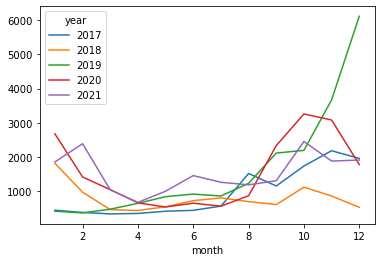

In [12]:
df_Pivot.plot()
plt.show()

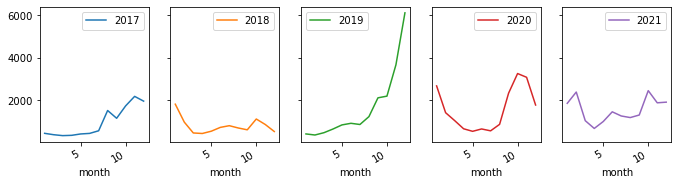

In [13]:
df_Pivot.plot(subplots = True, figsize=(16, 16), layout=(5, 7), sharey=True)
plt.show()

In [14]:
#LOG

<AxesSubplot:ylabel='Frequency'>

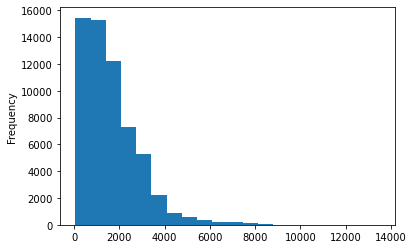

In [15]:
df.MODAL.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Frequency'>

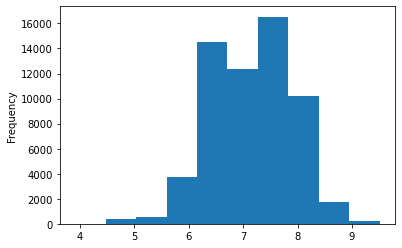

In [16]:
np.log(df.MODAL).plot(kind='hist')

<AxesSubplot:>

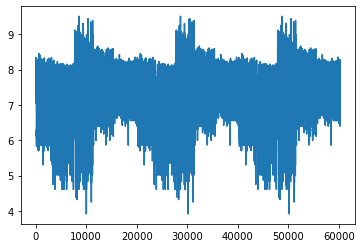

In [17]:
np.log(df.MODAL).plot()

In [18]:
m=np.log(df.MODAL)

<AxesSubplot:xlabel='market_center_name', ylabel='MODAL'>

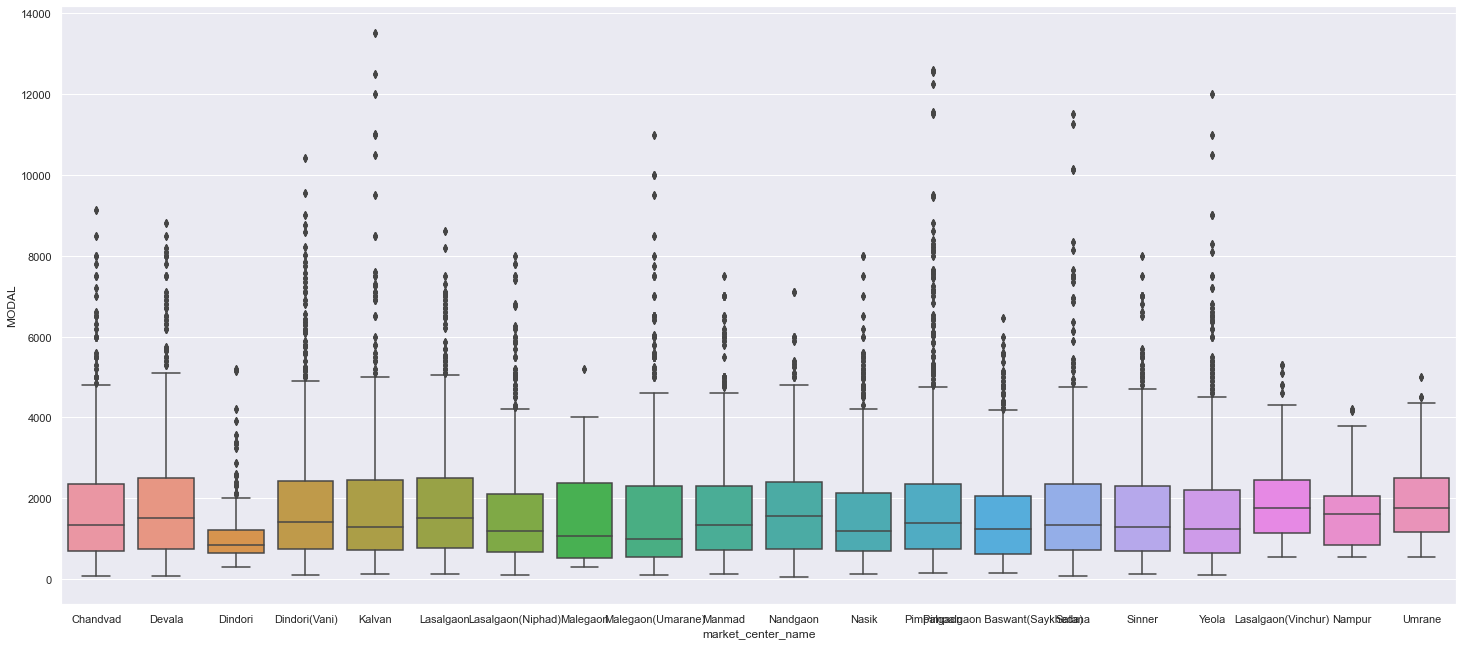

In [19]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,11)})
sns.boxplot(x = 'market_center_name', y = 'MODAL',data=df)

In [20]:
df['Open:30 days rolling']=df['Arrival'].rolling(30).mean()

In [21]:
df.head(31)

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,year,month,day,priceDiff,Open:30 days rolling
0,Maharashtra,Nashik,Chandvad,Red,Vegetables,1505,1200,3025,2850,2017,12,29,1825,NaN
1,Maharashtra,Nashik,Chandvad,Red,Vegetables,1200,1700,2976,2800,2017,12,28,1276,NaN
2,Maharashtra,Nashik,Chandvad,Red,Vegetables,1912,1500,3000,2850,2017,12,27,1500,NaN
3,Maharashtra,Nashik,Chandvad,Red,Vegetables,800,1300,2750,2490,2017,12,22,1450,NaN
4,Maharashtra,Nashik,Chandvad,Red,Vegetables,1588,1400,2850,2670,2017,12,21,1450,NaN
5,Maharashtra,Nashik,Chandvad,Red,Vegetables,1933,1700,2931,2750,2017,12,20,1231,NaN
6,Maharashtra,Nashik,Chandvad,Red,Vegetables,2283,1600,2825,2680,2017,12,19,1225,NaN
7,Maharashtra,Nashik,Chandvad,Red,Vegetables,1355,1400,2970,2700,2017,12,16,1570,NaN
8,Maharashtra,Nashik,Chandvad,Red,Vegetables,1644,1400,3051,2700,2017,12,15,1651,NaN
9,Maharashtra,Nashik,Chandvad,Red,Vegetables,1392,1200,3311,2750,2017,12,14,2111,NaN


<AxesSubplot:>

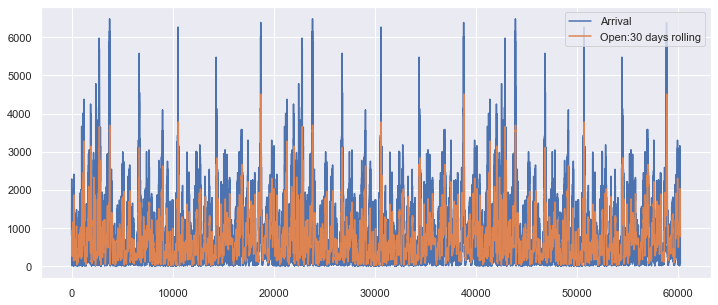

In [22]:
df[['Arrival','Open:30 days rolling']].plot(figsize=(12,5))

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
test_result=adfuller(df['Arrival'])

In [22]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Arrival):
    result=adfuller(Arrival)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [23]:
adfuller_test(df['Arrival'])

ADF Test Statistic : -18.348129644944393
p-value : 2.2392589390973694e-30
#Lags Used : 60
Number of Observations Used : 60195
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [24]:
adfuller_test(df['MODAL'])

ADF Test Statistic : -26.174934615324876
p-value : 0.0
#Lags Used : 60
Number of Observations Used : 60195
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [43]:
import statsmodels.api as sm

In [45]:
sm.tsa.acf(df['Arrival'])

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.80993653, 0.78599586, 0.75168033, 0.73951228,
       0.71738129, 0.7106593 , 0.66986105, 0.66835026, 0.64894675,
       0.63814728, 0.62166008, 0.61570588, 0.5811941 , 0.578653  ,
       0.55186894, 0.54828609, 0.52638849, 0.51677105, 0.49603319,
       0.49072628, 0.46916793, 0.46289944, 0.45039555, 0.44647479,
       0.42522682, 0.41927255, 0.40677794, 0.40101727, 0.38428833,
       0.3767444 , 0.36350629, 0.35925521, 0.34544993, 0.33788246,
       0.32744957, 0.32425906, 0.31602006, 0.30904385, 0.30159877,
       0.29708693])

In [52]:
sm.tsa.acf(df['Arrival'], nlags=30)


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.80993653, 0.78599586, 0.75168033, 0.73951228,
       0.71738129, 0.7106593 , 0.66986105, 0.66835026, 0.64894675,
       0.63814728, 0.62166008, 0.61570588, 0.5811941 , 0.578653  ,
       0.55186894, 0.54828609, 0.52638849, 0.51677105, 0.49603319,
       0.49072628, 0.46916793, 0.46289944, 0.45039555, 0.44647479,
       0.42522682, 0.41927255, 0.40677794, 0.40101727, 0.38428833,
       0.3767444 ])

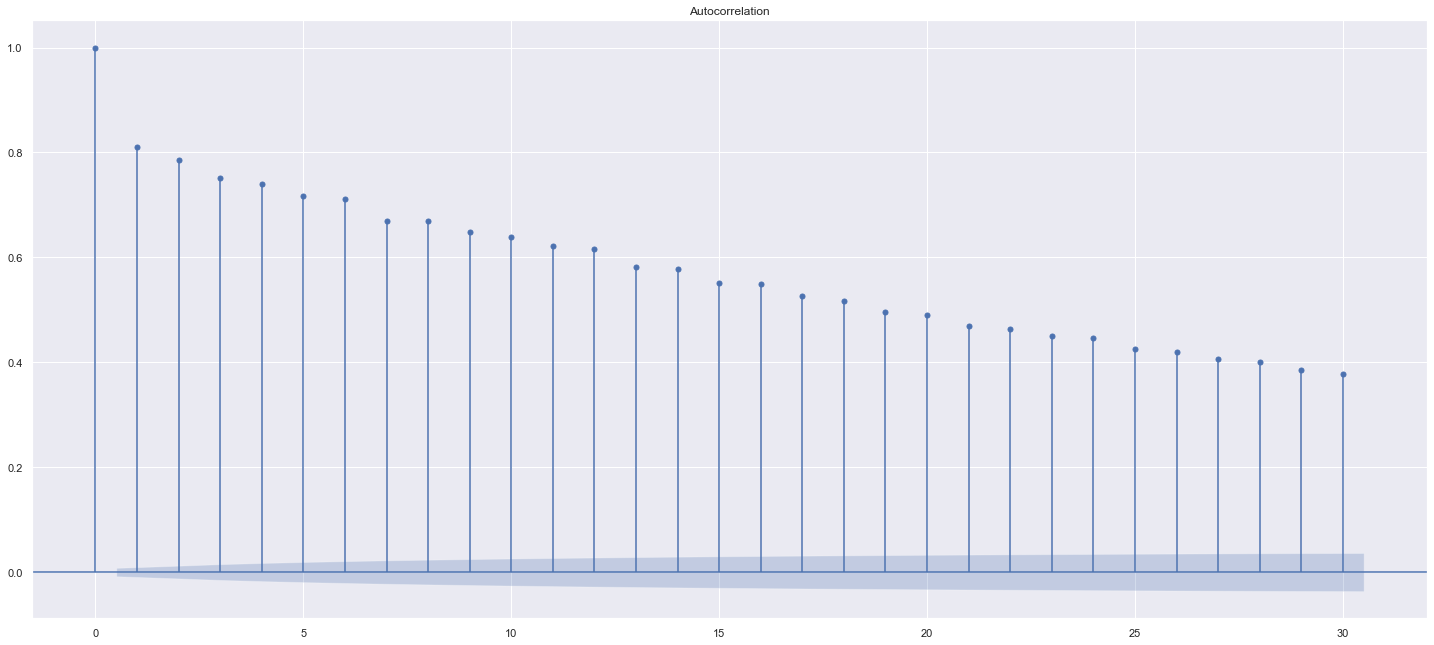

In [54]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(df['Arrival'], lags=30)
plt.show()